In [70]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[2]
Data_base_learning_v2 = main_path+open_folder[3]
Points_equipe = main_path+open_folder[3]
Teams_puissance = main_path+open_folder[5]

In [72]:
train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,goalHomeTeam_FullTime,goalAwayTeam_FullTime,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam
0,0,2019-08-09,548,523,AS Monaco FC,Olympique Lyonnais,2.0,0,2,0,3,-1,-1,-1,-1,2409,6154
1,1,2019-08-10,516,547,Olympique de Marseille,Stade de Reims,2.0,0,0,0,2,-1,-1,-1,-1,4008,3054
2,2,2019-08-10,518,529,Montpellier HSC,Stade Rennais FC 1901,2.0,0,1,0,1,-1,-1,-1,-1,3029,100
3,3,2019-08-10,522,530,OGC Nice,Amiens SC,1.0,1,0,2,1,-1,-1,-1,-1,2803,2045
4,4,2019-08-10,512,511,Stade Brestois 29,Toulouse FC,0.0,1,0,1,1,-1,-1,-1,-1,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1714,2020-02-26,523,109,Olympique Lyonnais,Juventus FC,1.0,1,0,1,0,1,2,0,0,6154,9319
1287,1715,2020-03-10,95,102,Valencia CF,Atalanta BC,2.0,1,2,3,4,0,4,0,0,9770,7928
1288,1716,2020-03-10,721,73,RB Leipzig,Tottenham Hotspur FC,1.0,2,0,3,0,1,0,0,0,9221,6821
1289,1717,2020-03-11,524,4,Paris Saint-Germain FC,BV Borussia 09 Dortmund,1.0,2,0,2,0,2,2,0,0,9495,7276


In [73]:
X = train_csv.drop(['idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
X = X[:,1:]
Y = train_csv['score'].values
X[0]

array([  -1,   -1,   -1,   -1, 2409, 6154], dtype=int64)

In [74]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)

(1032, 6) (1032,)


In [75]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [76]:
# for row in y_train:
#      print(row)

In [77]:
x_train

array([[    1,     0,     0,     2,  7928,  6735],
       [    0,     0,     0,     1,  4059,  6273],
       [    0,     0,     1,     0,  9495,  2298],
       ...,
       [    1,     0,     0,     0, 10390,  7928],
       [    0,     0,     0,     2,  9770,  5396],
       [    0,     0,     1,     3,  2280,  3086]], dtype=int64)

In [106]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [107]:
model = create_model()
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_137 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_138 (Dense)            (None, 3)                 387       
Total params: 69,635
Trainable params: 69,635
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=60,epochs=200)

Train on 1032 samples, validate on 259 samples
Epoch 1/200
1032/1032 [==============================] - 1s 849us/sample - loss: 214.0256 - accuracy: 0.4196 - val_loss: 156.0885 - val_accuracy: 0.3861
Epoch 2/200
1032/1032 [==============================] - 0s 166us/sample - loss: 122.3647 - accuracy: 0.4196 - val_loss: 169.7547 - val_accuracy: 0.2201
Epoch 3/200
1032/1032 [==============================] - 0s 85us/sample - loss: 147.5191 - accuracy: 0.3934 - val_loss: 123.1277 - val_accuracy: 0.4826
Epoch 4/200
1032/1032 [==============================] - 0s 76us/sample - loss: 88.3840 - accuracy: 0.4176 - val_loss: 104.1685 - val_accuracy: 0.3166
Epoch 5/200
1032/1032 [==============================] - 0s 92us/sample - loss: 61.7868 - accuracy: 0.4225 - val_loss: 140.3612 - val_accuracy: 0.3552
Epoch 6/200
1032/1032 [==============================] - 0s 92us/sample - loss: 112.3458 - accuracy: 0.4205 - val_loss: 95.6334 - val_accuracy: 0.2587
Epoch 7/200
1032/1032 [===================

Epoch 55/200
1032/1032 [==============================] - 0s 88us/sample - loss: 39.0357 - accuracy: 0.4118 - val_loss: 29.4978 - val_accuracy: 0.3938
Epoch 56/200
1032/1032 [==============================] - 0s 116us/sample - loss: 27.6535 - accuracy: 0.4099 - val_loss: 10.4072 - val_accuracy: 0.5058
Epoch 57/200
1032/1032 [==============================] - 0s 96us/sample - loss: 12.3325 - accuracy: 0.4157 - val_loss: 13.0085 - val_accuracy: 0.3668
Epoch 58/200
1032/1032 [==============================] - 0s 100us/sample - loss: 26.3724 - accuracy: 0.4060 - val_loss: 20.4779 - val_accuracy: 0.3475
Epoch 59/200
1032/1032 [==============================] - 0s 121us/sample - loss: 23.4066 - accuracy: 0.3818 - val_loss: 15.6430 - val_accuracy: 0.4865
Epoch 60/200
1032/1032 [==============================] - 0s 118us/sample - loss: 18.0834 - accuracy: 0.4380 - val_loss: 13.3555 - val_accuracy: 0.4672
Epoch 61/200
1032/1032 [==============================] - 0s 103us/sample - loss: 20.1982 

Epoch 109/200
1032/1032 [==============================] - 0s 90us/sample - loss: 14.2770 - accuracy: 0.4176 - val_loss: 18.8796 - val_accuracy: 0.2239
Epoch 110/200
1032/1032 [==============================] - 0s 112us/sample - loss: 12.0110 - accuracy: 0.4070 - val_loss: 16.7276 - val_accuracy: 0.3127
Epoch 111/200
1032/1032 [==============================] - 0s 92us/sample - loss: 11.6154 - accuracy: 0.3953 - val_loss: 8.8264 - val_accuracy: 0.3243
Epoch 112/200
1032/1032 [==============================] - 0s 112us/sample - loss: 7.5648 - accuracy: 0.4234 - val_loss: 3.6467 - val_accuracy: 0.5212
Epoch 113/200
1032/1032 [==============================] - 0s 148us/sample - loss: 10.2764 - accuracy: 0.3886 - val_loss: 7.8369 - val_accuracy: 0.3591
Epoch 114/200
1032/1032 [==============================] - 0s 88us/sample - loss: 11.2771 - accuracy: 0.4205 - val_loss: 10.6536 - val_accuracy: 0.3745
Epoch 115/200
1032/1032 [==============================] - 0s 88us/sample - loss: 7.9879 

1032/1032 [==============================] - 0s 99us/sample - loss: 4.6167 - accuracy: 0.4574 - val_loss: 15.1807 - val_accuracy: 0.2124
Epoch 164/200
1032/1032 [==============================] - 0s 110us/sample - loss: 6.9609 - accuracy: 0.4341 - val_loss: 4.7335 - val_accuracy: 0.5444
Epoch 165/200
1032/1032 [==============================] - 0s 105us/sample - loss: 5.1413 - accuracy: 0.4302 - val_loss: 7.9280 - val_accuracy: 0.4440
Epoch 166/200
1032/1032 [==============================] - 0s 102us/sample - loss: 5.1895 - accuracy: 0.4293 - val_loss: 2.7584 - val_accuracy: 0.5212
Epoch 167/200
1032/1032 [==============================] - 0s 107us/sample - loss: 3.9005 - accuracy: 0.4302 - val_loss: 7.9669 - val_accuracy: 0.3282
Epoch 168/200
1032/1032 [==============================] - 0s 131us/sample - loss: 6.6376 - accuracy: 0.4031 - val_loss: 4.5000 - val_accuracy: 0.4286
Epoch 169/200
1032/1032 [==============================] - 0s 97us/sample - loss: 3.7185 - accuracy: 0.4244 

Text(0, 0.5, 'Accuracy')

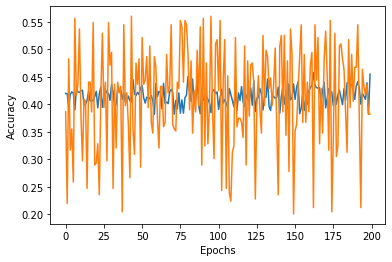

In [109]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [110]:
predictions = model.predict((x_test, y_test))

In [111]:
print(x_test[98])
print(y_test[98])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[98])
np.argmax(predictions[98])

[   0    0    3    0 2866 4490]
2
[0.03437076 0.795695   0.16993429]


1

# Prédiction Unique

In [112]:
unique = train_csv.values
results = []
i = 0

In [113]:
for i in unique:
    puissance_homeTeam = i[15]
    puissance_awayTeam = i[16]
    win_cons_home = i[11]
    win_cons_away = i[12]
    lose_cons_home = i[13]
    lose_cons_away= i[14]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    result = np.argmax(predictions1)
    results.append(result)
    print(result,puissance_homeTeam,puissance_awayTeam)

1 2409 6154
0 4008 3054
1 3029 100
0 2803 2045
2 2156 1065
0 2690 2298
1 100 3749
0 4207 3029
2 3627 1736
1 9495 2020
0 6154 2690
1 3029 4008
1 2298 3029
1 1065 100
1 2020 2803
1 1736 2409
1 2045 4207
0 3749 2156
1 3054 3627
1 100 9495
1 2156 3054
0 2690 1736
1 100 2298
1 2045 3029
1 2409 2020
2 3627 100
1 9495 1065
1 3029 6154
1 4207 3749
1 2803 4008
2 1736 9495
0 6154 2298
1 1065 2045
1 2690 100
1 3029 3029
1 2020 2156
1 100 2803
1 3054 4207
0 3627 2409
1 4008 3749
0 4207 2690
1 2045 6154
0 9495 3627
1 3029 2803
0 2298 1736
1 2156 100
1 100 2020
1 3029 3054
1 3749 1065
1 2409 4008
1 3627 3029
1 4008 3029
1 2298 2156
1 2803 100
1 3054 2409
0 2020 1065
1 1736 2045
1 100 4207
1 2690 3749
1 6154 9495
1 100 4008
1 2409 2803
0 3029 2020
1 4207 3627
0 3749 1736
1 1065 2690
1 2156 6154
1 3029 100
1 2045 2298
1 9495 3054
2 6154 3029
2 2298 9495
1 2803 4207
1 3054 100
1 2690 2045
1 2409 2156
0 1736 1065
1 3627 3029
1 2020 3749
1 4008 100
1 2045 4008
1 9495 2690
0 3029 2409
1 1065 2298
0 2156 1

1 100 3861
1 4803 7427
1 7427 100
1 3663 4059
2 9770 4803
1 3861 8949
2 13105 4059
1 2475 5396
1 6139 4554
1 9329 6273
0 7881 3267
1 4257 7447
0 4554 2475
1 100 13105
1 4257 9770
1 4803 9329
1 8949 7427
1 6273 7881
1 3267 6139
1 3861 3663
1 5396 4059
1 4059 7447
1 4059 4059
1 3663 8949
0 7427 3861
1 2475 4257
0 9770 5396
1 7447 100
1 6139 4803
2 6273 3267
0 7881 4554
1 9329 13105
1 5396 9329
1 8949 6273
1 4803 3663
1 4554 9770
1 13105 2475
1 3861 7881
1 4257 6139
1 4059 7427
1 100 4059
1 3267 7447
1 3663 100
1 4803 4554
1 7427 13105
1 6139 3861
2 9329 3267
0 7881 4059
0 4059 2475
1 6273 4257
1 7447 5396
1 9770 8949
1 13105 8949
1 3861 4803
1 2475 7447
1 13105 3663
1 5396 7881
1 4059 9770
1 100 6273
1 3267 7427
1 4257 9329
1 4554 4059
1 8949 6139
1 4059 100
1 7447 6139
0 9770 3861
1 7881 8949
1 9329 4554
1 6273 13105
0 4803 2475
1 7427 5396
1 3663 4257
1 4059 3267
1 100 7881
1 4554 3663
1 8949 7447
1 3267 4059
1 3861 9329
2 2475 9770
1 4257 7427
1 5396 6273
0 6139 4059
2 13105 4803
1 32

In [93]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [94]:
predictions1

array([[2.4449762e-30, 1.0000000e+00, 2.4717988e-21]], dtype=float32)

In [95]:
result

1

In [96]:
df = {'date':train_csv.date,'id_HomeTeam':train_csv.idHomeTeam,'id_AwayTeam':train_csv.idAwayTeam,'prediction':results}

In [97]:
d = pd.DataFrame(df)

In [98]:
d

,date,id_HomeTeam,id_AwayTeam,prediction
0,2019-08-09,548,523,1
1,2019-08-10,516,547,1
2,2019-08-10,518,529,1
3,2019-08-10,522,530,1
4,2019-08-10,512,511,1
...,...,...,...,...
1286,2020-02-26,523,109,1
1287,2020-03-10,95,102,1
1288,2020-03-10,721,73,1
1289,2020-03-11,524,4,1


In [99]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')